Load and clean data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
hitters = pd.read_csv('/content/drive/My Drive/Hitters.csv')

In [ ]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [ ]:
# Drop all NA values
hitters = hitters.dropna()

In [ ]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [ ]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

***Part I: Different Model Specs***

**A. Regression without regularization**

1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary linear regression

In [ ]:
X = hitters.drop('Salary', axis=1)
y = hitters['Salary']

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),  # Grab all string columns
        ("standardize",
         StandardScaler(),
         make_column_selector(dtype_include=np.number))  # Grab all numerical columns
    ],
    remainder="passthrough"
)

# Creating a pipeline that includes preprocessing and linear regression.
lr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("linear_regression", LinearRegression())]
)

2. Fit this pipeline to the full dataset, and interpret a few of the most important coefficients.

In [ ]:
# Fit the pipeline to your data.
lr_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b8406716440>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b84067158a0>)])),
                ('linear_regression', LinearRegression())])

In [ ]:
fitted_lr_model = lr_pipeline.named_steps['linear_regression']

# Get the coefficients from the model/access feature names
coefficients = fitted_lr_model.coef_
feature_names = lr_pipeline.named_steps['preprocessing'].get_feature_names_out()

# Create a series and sort coefficientw
coef_series = pd.Series(coefficients, index=feature_names)
linear_coef = coef_series.sort_values(ascending=False)

# Print most influential variables
linear_coef.head()

standardize__CRuns    480.747135
standardize__Hits     337.830479
standardize__CRBI     260.689886
standardize__Walks    135.073897
standardize__CHits     86.687617
dtype: float64

It looks like CRuns, Hits, and CRBI are a few of the most important coefficients for the linear model.  With every additional "CRun", salary is expected to increase 480.75 dollars.  With every additional "Hit", salary is expected to increase 337.83 dollars.  With every additional "CRBI", salary is expected to increase 260.69 dollars.

3. Use cross-validation to estimate the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

121136.31031816888

The MSE you would expect to see if you used this pipeline to predict 1989 salaries would be 121136.31.

**B. Ridge regression**

1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression

In [ ]:
ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge())]
)

2. Use cross-validation to tune the lambda hyperparameter.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Define a negative MSE scorer (since GridSearchCV maximizes the score)
neg_mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

param_grid = {
    'ridge_regression__alpha': [0.01, 0.1, 1, 10, 100]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'ridge_regression__alpha': 1}


3. Fit the pipeline with your chosen lambda to the full dataset, and interpret a few of the most important coefficients.

In [ ]:
ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(1))]
)

In [ ]:
ridge_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b84012155a0>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b8401214580>)])),
                ('ridge_regression', Ridge(alpha=1))])

In [ ]:
fitted_ridge_model = ridge_pipeline.named_steps['ridge_regression']

# Get the coefficients from the model/access feature names
coefficients = fitted_ridge_model.coef_
feature_names = ridge_pipeline.named_steps['preprocessing'].get_feature_names_out()

# Create a series and sort coefficientw
coef_series = pd.Series(coefficients, index=feature_names)
ridge_coef = coef_series.sort_values(ascending=False)

# Print most influential variables
ridge_coef.head()

standardize__CRuns    320.412169
standardize__Hits     296.645050
standardize__CRBI     160.386784
standardize__CHits    126.659607
standardize__Walks    124.407173
dtype: float64

It looks like CRuns, Hits, and CRBI are a few of the most important coefficients for the ridge model.  With every additional "CRuns", salary is expected to increase 320.41 dollars.  With every additional "Hit", salary is expected to increase 296.65 dollars.  With every additional "CRBI", salary is expected to increase 160.39 dollars.

4. Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

119144.4326769158

The MSE you would expect to see if you used this pipeline to predict 1989 salaries would be 119144.43.

**C. Lasso Regression**

1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary lasso regression.

In [ ]:
lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(max_iter=10000))]
)

2. Use cross-validation to tune the lambda hyperparameter.

In [ ]:
param_grid = {
    'lasso_regression__alpha': [0.01, 0.1, 1, 10, 100]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'lasso_regression__alpha': 1}


3. Fit the pipeline with your chosen lambda to the full dataset, and interpret a few of the most important coefficients.

In [ ]:
lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(alpha=1, max_iter=10000))]
)

In [ ]:
lasso_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b8406716440>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b84067158a0>)])),
                ('lasso_regression', Lasso(alpha=1, max_iter=10000))])

In [ ]:
fitted_lasso_model = lasso_pipeline.named_steps['lasso_regression']

# Get the coefficients from the model/access feature names
coefficients = fitted_lasso_model.coef_
feature_names = lasso_pipeline.named_steps['preprocessing'].get_feature_names_out()

# Create a series and sort coefficientw
coef_series = pd.Series(coefficients, index=feature_names)
lasso_coef = coef_series.sort_values(ascending=False)

# Print most influential variables
lasso_coef.head()

standardize__CRuns      3.755655e+02
standardize__Hits       3.043595e+02
standardize__CRBI       1.926109e+02
standardize__Walks      1.206953e+02
dummify__Division_E     1.144130e+02
standardize__PutOuts    7.876037e+01
standardize__Assists    4.199668e+01
standardize__CHmRun     1.422599e+01
standardize__HmRun      1.112702e+01
dummify__League_N       9.974641e-14
dummify__NewLeague_A    0.000000e+00
dummify__NewLeague_N   -0.000000e+00
standardize__RBI       -0.000000e+00
standardize__CHits      0.000000e+00
dummify__Division_W    -2.078929e-11
standardize__Errors    -1.847938e+01
standardize__Runs      -2.496651e+01
standardize__Years     -3.494815e+01
dummify__League_A      -3.582607e+01
standardize__CAtBat    -1.626398e+02
standardize__CWalks    -1.896446e+02
standardize__AtBat     -2.823710e+02
dtype: float64

It looks like CRuns, Hits, and CRBI are a few of the most important coefficients for the lasso model. With every additional "CRuns", salary is expected to increase 375.57 dollars. With every additional "Hit", salary is expected to increase 304.36 dollars. With every additional "CRBI", salary is expected to increase 192.61 dollars.

4. Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

119758.10887295303

The MSE you would expect to see if you used this pipeline to predict 1989 salaries would be 119758.11.

**D. Elastic Net**

1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression

In [ ]:
elastic_pipeline = Pipeline([
    ('preprocessing', ct),
    ('elasticnet', ElasticNet(max_iter=1000000))
])

2. Use cross-validation to tune the lambda and alpha hyperparameter.

In [ ]:
param_grid = {
    'elasticnet__alpha': [0.01, 0.1, 1, 10, 100]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'elasticnet__alpha': 0.01}


In [ ]:
param_grid = {
    'elasticnet__l1_ratio': [0.01, 0.1, 1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'elasticnet__l1_ratio': 0.99}


In [ ]:
param_grid = {
    'elasticnet__l1_ratio': [0.984, 0.985, 0.986]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'elasticnet__l1_ratio': 0.985}


3. Fit the pipeline with your chosen hyperparameters to the full dataset, and interpret a few of the most important coefficients.

In [ ]:
elastic_pipeline = Pipeline([
    ('preprocessing', ct),
    ('elasticnet', ElasticNet(alpha=0.01, l1_ratio=0.985))
])

In [ ]:
elastic_pipeline.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.695e+06, tolerance: 5.332e+03
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b84012155a0>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b8401214580>)])),
                ('elasticnet', ElasticNet(alpha=0.01, l1_ratio=0.985))])

In [ ]:
fitted_elastic_model = elastic_pipeline.named_steps['elasticnet']

# Get the coefficients from the model/access feature names
coefficients = fitted_elastic_model.coef_
feature_names = elastic_pipeline.named_steps['preprocessing'].get_feature_names_out()

# Create a series and sort coefficientw
coef_series = pd.Series(coefficients, index=feature_names)
elastic_coef = coef_series.sort_values(ascending=False)

# Print most influential variables
elastic_coef.head()

standardize__CRuns    457.793204
standardize__Hits     330.902340
standardize__CRBI     241.953239
standardize__Walks    133.549809
standardize__CHits    126.110281
dtype: float64

It looks like CRuns, Hits, and CRBI are a few of the most important coefficients for the elastic model. With every additional "CRun", salary is expected to increase 457.79 dollars. With every additional "Hit", salary is expected to increase 330.90 dollars. With every additional "CRBI", salary is expected to increase 241.95 dollars.

4. Report the MSE you would expect if you used this pipeline to predict 1989 salaries.

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(elastic_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.049e+06, tolerance: 4.708e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.550e+06, tolerance: 3.606e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.334e+06, tolerance: 4.137e

120710.34230867462

The MSE you would expect to see if you used this pipeline to predict 1989 salaries would be 120710.34.

***Part II. Variable Selection***

Based on the above results, decide on:

* Which numeric variable is most important.

* Which five numeric variables are most important

* Which categorical variable is most important

In [ ]:
linear_coef.head(10)

standardize__CRuns      480.747135
standardize__Hits       337.830479
standardize__CRBI       260.689886
standardize__Walks      135.073897
standardize__CHits       86.687617
standardize__PutOuts     78.761296
dummify__Division_E      58.424623
standardize__Assists     53.732490
standardize__HmRun       37.853837
dummify__League_N        31.299712
dtype: float64

In [ ]:
ridge_coef.head(10)

standardize__CRuns      320.412169
standardize__Hits       296.645050
standardize__CRBI       160.386784
standardize__CHits      126.659607
standardize__Walks      124.407173
standardize__PutOuts     78.623656
dummify__Division_E      60.015595
standardize__Assists     47.462597
standardize__CHmRun      39.070924
dummify__League_N        30.438855
dtype: float64

In [ ]:
lasso_coef.head(10)

standardize__CRuns      3.755655e+02
standardize__Hits       3.043595e+02
standardize__CRBI       1.926109e+02
standardize__Walks      1.206953e+02
dummify__Division_E     1.144130e+02
standardize__PutOuts    7.876037e+01
standardize__Assists    4.199668e+01
standardize__CHmRun     1.422599e+01
standardize__HmRun      1.112702e+01
dummify__League_N       9.974641e-14
dtype: float64

In [ ]:
elastic_coef.head(10)

standardize__CRuns      457.793204
standardize__Hits       330.902340
standardize__CRBI       241.953239
standardize__Walks      133.549809
standardize__CHits      126.110281
standardize__PutOuts     78.679031
dummify__Division_E      75.811891
standardize__Assists     53.853393
standardize__HmRun       35.277092
dummify__League_N        22.572757
dtype: float64

From our above results, the most obvious deduction is that the "Division" variable is the most important categorical variable.  Though less obvious, I would say the top 5 numeric variables are "CRuns", "Hits", "CRBI", "Walks", and "CHits".  The most important numeric variable seems to be "CRuns."

For each of the four model specifications, compare the following possible feature sets:

* Using only the one best numeric variable.

* Using only the five best variables.

* Using the five best numeric variables and their interactions with the one best categorical variable.

**Using Only the best numeric variable (Hits).**

In [ ]:
X = hitters[['CRuns']]
y = hitters['Salary']

In [ ]:
# linear pipeline with 1 variable
lr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("linear_regression", LinearRegression())]
)

In [ ]:
# Fit the pipeline to your data.
lr_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b84012155a0>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b8401214580>)])),
                ('linear_regression', LinearRegression())])

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

143812.9359162973

In [ ]:
# Ridge Pipeline with 1 variable
ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge())]
)

In [ ]:
# Cross-validation to tune lambda
param_grid = {
    'ridge_regression__alpha': [0.01, 0.1, 1, 10, 100]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'ridge_regression__alpha': 10}


In [ ]:
# Fit Ridge pipeline
ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(10))]
)
ridge_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b84012155a0>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b8401214580>)])),
                ('ridge_regression', Ridge(alpha=10))])

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

143658.5173685888

In [ ]:
# Lasso Pipeline with 1 variable
lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(max_iter=10000))]
)

In [ ]:
param_grid = {
    'lasso_regression__alpha': [0.01, 0.1, 1, 10, 100]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'lasso_regression__alpha': 10}


In [ ]:
# Fit Lasso pipeline
lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(alpha=10, max_iter=10000))]
)
lasso_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b84012155a0>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b8401214580>)])),
                ('lasso_regression', Lasso(alpha=10, max_iter=10000))])

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

143793.4491585397

In [ ]:
# Elastic pipeline with 1 variable
elastic_pipeline = Pipeline([
    ('preprocessing', ct),
    ('elasticnet', ElasticNet())
])

In [ ]:
param_grid = {
    'elasticnet__alpha': [0.01, 0.1, 1, 10, 100]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'elasticnet__alpha': 0.1}


In [ ]:
param_grid = {
    'elasticnet__l1_ratio': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'elasticnet__l1_ratio': 0.99}


In [ ]:
param_grid = {
    'elasticnet__l1_ratio': [0.942,0.943,0.944]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'elasticnet__l1_ratio': 0.943}


In [ ]:
# Fit elastic pipeline
elastic_pipeline = Pipeline([
    ('preprocessing', ct),
    ('elasticnet', ElasticNet(alpha=0.1, l1_ratio=0.943))
])
elastic_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b84012155a0>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b8401214580>)])),
                ('elasticnet', ElasticNet(alpha=0.1, l1_ratio=0.943))])

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(elastic_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

122649.68457272874

**Using the best 5 numeric variables (Hits, CRBI, PutOuts, CRuns, CHits).**

In [ ]:
X = hitters[['Hits', 'CRBI', 'Walks', 'CRuns', 'CHits']]
y = hitters['Salary']

In [ ]:
# linear pipeline with 5 variables
lr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("linear_regression", LinearRegression())]
)

In [ ]:
# Fit the pipeline to your data.
lr_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b84012155a0>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b8401214580>)])),
                ('linear_regression', LinearRegression())])

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

126047.77085146765

In [ ]:
# Ridge Pipeline with 5 variables
ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge())]
)

In [ ]:
# Cross-validation to tune lambda
param_grid = {
    'ridge_regression__alpha': [0.01, 0.1, 1, 10, 100]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'ridge_regression__alpha': 100}


In [ ]:
# Fit Ridge pipeline
ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(100))]
)
ridge_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b84012155a0>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b8401214580>)])),
                ('ridge_regression', Ridge(alpha=100))])

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

122492.15914539217

In [ ]:
# Lasso Pipeline with 5 variables
lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(max_iter=10000))]
)

In [ ]:
param_grid = {
    'lasso_regression__alpha': [0.01, 0.1, 1, 10, 100]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'lasso_regression__alpha': 10}


In [ ]:
# Fit Lasso pipeline
lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(alpha=0.01, max_iter=10000))]
)
lasso_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b84012155a0>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b8401214580>)])),
                ('lasso_regression', Lasso(alpha=0.01, max_iter=10000))])

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

126034.18385601559

In [ ]:
# Elastic pipeline with 5 variables
elastic_pipeline = Pipeline([
    ('preprocessing', ct),
    ('elasticnet', ElasticNet())
])

In [ ]:
param_grid = {
    'elasticnet__alpha': [0.01, 0.1, 1, 10, 100]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'elasticnet__alpha': 1}


In [ ]:
param_grid = {
    'elasticnet__l1_ratio': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'elasticnet__l1_ratio': 0.7}


In [ ]:
param_grid = {
    'elasticnet__l1_ratio': [0.743, 0.744, 0.745]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'elasticnet__l1_ratio': 0.744}


In [ ]:
# Fit elastic pipeline
elastic_pipeline = Pipeline([
    ('preprocessing', ct),
    ('elasticnet', ElasticNet(alpha=1, l1_ratio=0.744))
])
elastic_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b84012155a0>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b8401214580>)])),
                ('elasticnet', ElasticNet(alpha=1, l1_ratio=0.744))])

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(elastic_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

122076.54097704959

**Using the best 5 numeric variables and interaction with categorical variable Division (Hits, CRBI, PutOuts, CRuns, CHits, Division).**

In [ ]:
X = hitters[['Hits', 'CRBI', 'Walks', 'CRuns', 'CHits', 'Division']]
y = hitters['Salary']

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

class InteractionWithDivision(BaseEstimator, TransformerMixin):
    def __init__(self, division_column_index, numerical_columns_indices):
        self.division_column_index = division_column_index
        self.numerical_columns_indices = numerical_columns_indices

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        interactions = []
        division_column = X[:, self.division_column_index]

        for col_index in self.numerical_columns_indices:
            interaction_column = X[:, col_index] * division_column
            interactions.append(interaction_column.reshape(-1, 1))

        return np.hstack(interactions)

# Define the column indices for the interaction transformer
division_column_index = 0
numerical_columns_indices = [1, 2, 3, 4, 5]

# Create pipeline
lr_pipeline = Pipeline([
    ('preprocessing', ColumnTransformer([
        ('dummify', OneHotEncoder(), ['Division']),
        ('other_cols', 'passthrough', [col for col in X.columns if col != 'Division'])
    ])),
    ('interaction_union', FeatureUnion([
        ('interaction', InteractionWithDivision(division_column_index, numerical_columns_indices)),
        ('original', 'passthrough')
    ])),
    ('linear_regression', LinearRegression())
])


In [ ]:
# linear pipeline with 5 variables and interaction with Division

lr_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify', OneHotEncoder(),
                                                  ['Division']),
                                                 ('other_cols', 'passthrough',
                                                  ['Hits', 'CRBI', 'Walks',
                                                   'CRuns', 'CHits'])])),
                ('interaction_union',
                 FeatureUnion(transformer_list=[('interaction',
                                                 InteractionWithDivision(division_column_index=0,
                                                                         numerical_columns_indices=[1,
                                                                                                    2,
                                                                                                    3,
                                                                                                    4,
                                                                                                    5])),
                                                ('original',
                                                 FunctionTransformer(feature_names_out='one-to-one'))])),
                ('linear_regression', LinearRegression())])

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

132170.04274813124

In [ ]:
# Ridge Pipeline with 5 variables and interaction
ridge_pipeline = Pipeline([
    ('preprocessing', ColumnTransformer([
        ('dummify', OneHotEncoder(), ['Division']),
        ('other_cols', 'passthrough', [col for col in X.columns if col != 'Division'])
    ])),
    ('interaction_union', FeatureUnion([
        ('interaction', InteractionWithDivision(division_column_index, numerical_columns_indices)),
        ('original', 'passthrough')
    ])),
    ('ridge_regression', Ridge())
])


In [ ]:
# Cross-validation to tune lambda
param_grid = {
    'ridge_regression__alpha': [0.01, 0.1, 1, 10, 100]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'ridge_regression__alpha': 100}


In [ ]:
ridge_pipeline = Pipeline([
    ('preprocessing', ColumnTransformer([
        ('dummify', OneHotEncoder(), ['Division']),
        ('other_cols', 'passthrough', [col for col in X.columns if col != 'Division'])
    ])),
    ('interaction_union', FeatureUnion([
        ('interaction', InteractionWithDivision(division_column_index, numerical_columns_indices)),
        ('original', 'passthrough')
    ])),
    ('ridge_regression', Ridge(100))
])
ridge_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify', OneHotEncoder(),
                                                  ['Division']),
                                                 ('other_cols', 'passthrough',
                                                  ['Hits', 'CRBI', 'Walks',
                                                   'CRuns', 'CHits'])])),
                ('interaction_union',
                 FeatureUnion(transformer_list=[('interaction',
                                                 InteractionWithDivision(division_column_index=0,
                                                                         numerical_columns_indices=[1,
                                                                                                    2,
                                                                                                    3,
                                                                                                    4,
                                                                                                    5])),
                                                ('original',
                                                 FunctionTransformer(feature_names_out='one-to-one'))])),
                ('ridge_regression', Ridge(alpha=100))])

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

131351.99415694625

In [ ]:
# Lasso pipeline with 5 variables and interaction
lasso_pipeline = Pipeline([
    ('preprocessing', ColumnTransformer([
        ('dummify', OneHotEncoder(), ['Division']),
        ('other_cols', 'passthrough', [col for col in X.columns if col != 'Division'])
    ])),
    ('interaction_union', FeatureUnion([
        ('interaction', InteractionWithDivision(division_column_index, numerical_columns_indices)),
        ('original', 'passthrough')
    ])),
    ('lasso_regression', Lasso(max_iter=10000))
])

In [ ]:
param_grid = {
    'lasso_regression__alpha': [0.01, 0.1, 1, 10, 100]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'lasso_regression__alpha': 100}


In [ ]:
# Lasso pipeline with 5 variables and interaction
lasso_pipeline = Pipeline([
    ('preprocessing', ColumnTransformer([
        ('dummify', OneHotEncoder(), ['Division']),
        ('other_cols', 'passthrough', [col for col in X.columns if col != 'Division'])
    ])),
    ('interaction_union', FeatureUnion([
        ('interaction', InteractionWithDivision(division_column_index, numerical_columns_indices)),
        ('original', 'passthrough')
    ])),
    ('lasso_regression', Lasso(alpha=100,max_iter=10000))
])
lasso_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify', OneHotEncoder(),
                                                  ['Division']),
                                                 ('other_cols', 'passthrough',
                                                  ['Hits', 'CRBI', 'Walks',
                                                   'CRuns', 'CHits'])])),
                ('interaction_union',
                 FeatureUnion(transformer_list=[('interaction',
                                                 InteractionWithDivision(division_column_index=0,
                                                                         numerical_columns_indices=[1,
                                                                                                    2,
                                                                                                    3,
                                                                                                    4,
                                                                                                    5])),
                                                ('original',
                                                 FunctionTransformer(feature_names_out='one-to-one'))])),
                ('lasso_regression', Lasso(alpha=100, max_iter=10000))])

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

129933.21071623769

In [ ]:
# Elastic pipeline with 5 variables and interaction
elastic_pipeline = Pipeline([
    ('preprocessing', ColumnTransformer([
        ('dummify', OneHotEncoder(), ['Division']),
        ('other_cols', 'passthrough', [col for col in X.columns if col != 'Division'])
    ])),
    ('interaction_union', FeatureUnion([
        ('interaction', InteractionWithDivision(division_column_index, numerical_columns_indices)),
        ('original', 'passthrough')
    ])),
    ('elasticnet', ElasticNet())
])

In [ ]:
param_grid = {
    'elasticnet__alpha': [0.01, 0.1, 1, 10, 100]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'elasticnet__alpha': 100}


In [ ]:
param_grid = {
    'elasticnet__l1_ratio': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'elasticnet__l1_ratio': 0.01}


In [ ]:
param_grid = {
    'elasticnet__l1_ratio': [0.01, 0.001, 0.05]
}

# Cross-validation with GridSearchCV
grid_search = GridSearchCV(elastic_pipeline, param_grid, cv=5, scoring=neg_mse_scorer) # cv=5 for 5-fold cross-validation

# Fit the model
grid_search.fit(X, y)

# Check the best alpha value and the corresponding performance
print(grid_search.best_params_)

{'elasticnet__l1_ratio': 0.001}


In [ ]:
# Elastic pipeline with 5 variables and interaction
elastic_pipeline = Pipeline([
    ('preprocessing', ColumnTransformer([
        ('dummify', OneHotEncoder(), ['Division']),
        ('other_cols', 'passthrough', [col for col in X.columns if col != 'Division'])
    ])),
    ('interaction_union', FeatureUnion([
        ('interaction', InteractionWithDivision(division_column_index, numerical_columns_indices)),
        ('original', 'passthrough')
    ])),
    ('elasticnet', ElasticNet(alpha=100, l1_ratio=0.001))
])
elastic_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify', OneHotEncoder(),
                                                  ['Division']),
                                                 ('other_cols', 'passthrough',
                                                  ['Hits', 'CRBI', 'Walks',
                                                   'CRuns', 'CHits'])])),
                ('interaction_union',
                 FeatureUnion(transformer_list=[('interaction',
                                                 InteractionWithDivision(division_column_index=0,
                                                                         numerical_columns_indices=[1,
                                                                                                    2,
                                                                                                    3,
                                                                                                    4,
                                                                                                    5])),
                                                ('original',
                                                 FunctionTransformer(feature_names_out='one-to-one'))])),
                ('elasticnet', ElasticNet(alpha=100, l1_ratio=0.001))])

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(elastic_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

129288.84484074805

**Report which combination of features and model performed best, based on the validation metric of MSE.**

The elastic pipeline using the 5 most important numeric variables performed the best out of any model in part II.  With a MSE of 122076.5 it is the lowest MSE of all models.

***Part III. Discussion***

**A. Ridge**

Compare your Ridge models with your ordinary regression models. How did your coefficients compare? Why does this make sense?

In [564]:
ridge_coef

standardize__CRuns      320.412169
standardize__Hits       296.645050
standardize__CRBI       160.386784
standardize__CHits      126.659607
standardize__Walks      124.407173
standardize__PutOuts     78.623656
dummify__Division_E      60.015595
standardize__Assists     47.462597
standardize__CHmRun      39.070924
dummify__League_N        30.438855
standardize__HmRun       18.100592
dummify__NewLeague_A     13.111282
standardize__RBI         -9.113295
dummify__NewLeague_N    -13.111282
standardize__Errors     -23.724190
standardize__Runs       -29.339406
dummify__League_A       -30.438855
standardize__Years      -38.667748
dummify__Division_W     -60.015595
standardize__CWalks    -184.423611
standardize__CAtBat    -225.406548
standardize__AtBat     -270.686441
dtype: float64

In [565]:
linear_coef

standardize__CRuns      480.747135
standardize__Hits       337.830479
standardize__CRBI       260.689886
standardize__Walks      135.073897
standardize__CHits       86.687617
standardize__PutOuts     78.761296
dummify__Division_E      58.424623
standardize__Assists     53.732490
standardize__HmRun       37.853837
dummify__League_N        31.299712
dummify__NewLeague_A     12.381163
dummify__NewLeague_N    -12.381163
standardize__CHmRun     -14.181723
standardize__Years      -16.693359
standardize__Errors     -22.160862
standardize__RBI        -26.994984
dummify__League_A       -31.299712
dummify__Division_W     -58.424623
standardize__Runs       -60.572479
standardize__CWalks    -213.892259
standardize__AtBat     -291.094556
standardize__CAtBat    -391.038655
dtype: float64

Ridge regression, much like linear regression, focuses on minimizing the sum of squared residuals. However, it goes a step further by also considering the sum of the squares of the coefficients, and this is multiplied by the regularization parameter. Because of this additional term, the coefficients in ridge regression end up being smaller (closer to zero) than what you'd typically find in a linear model that doesn't include this kind of regularization. Though a small change to the formula, it has an impact on the results.

**B. LASSO**

Compare your LASSO model in I with your three LASSO models in II. Did you get the same alpha results? Why does this make sense? Did you get the same MSEs? Why does this make sense?

Comparing LASSO Model from I with The others from II, we see a lot of difference.  The LASSO Model from 1 had an alpha value of 1, while the LASSO Model containing 1 variable had an alpha value of 10, the model containing 5 variables had a alpha value of 10, and the model with interaction variables had an alpha value of 100.  The choice of alpha depends on the complexity of the model and the characteristics of the data. For a model with many predictor variables like the first, a lower alpha value might suffice since the regularization effect is distributed across many variables. However, for models with fewer variables or interactions, a higher alpha might be necessary to control for overfitting.  The MSEs are as follows: 119758 for model I, 143793 for 1 variable model, 126034 for 5 variable model, and 131351 for interaction variable model.  The first model, with all predictor variables, might be capturing more variance in the data than the models with fewer predictors, explaining the lower MSE. That being said, it also risks including irrelevant variables, which can lead to overfitting.

**C. Elastic Net**

Compare your MSEs for the Elastic Net models with those for the Ridge and LASSO models. Why does it make sense that Elastic Net always “wins”?

For some reason, the elastic models do not always "win."  This could be down to the fact that I tuned for a different alpha value for each model.  Perhaps if I used the same alpha value from model to model, the elastic models would have had the smallest MSE values.  The reason that the elastic model *should* win is that elastic net is a hybrid approach that combines the features of both LASSO and Ridge regression. It includes two regularization terms: one similar to LASSO and one similar to Ridge. This blend allows elastic net to inherit the strengths and mitigate some of the weaknesses of LASSO and Ridge models.

***Part IV: Final Model***

Fit your final best pipeline on the full dataset, and summarize your results in a few short sentences and a plot.

In [ ]:
# Best model is the ridge pipeline including all variables
X = hitters.drop('Salary', axis=1)
y = hitters['Salary']

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),  # Grab all string columns
        ("standardize",
         StandardScaler(),
         make_column_selector(dtype_include=np.number))  # Grab all numerical columns
    ],
    remainder="passthrough"
)
ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(1))]
)

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the average MSE
mse_scores = -scores
mse_scores.mean()

119144.4326769158

In [ ]:
# 5-fold cross-validation to estimate MSE
scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')
scores.mean()

0.3557674151310445

In [ ]:
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

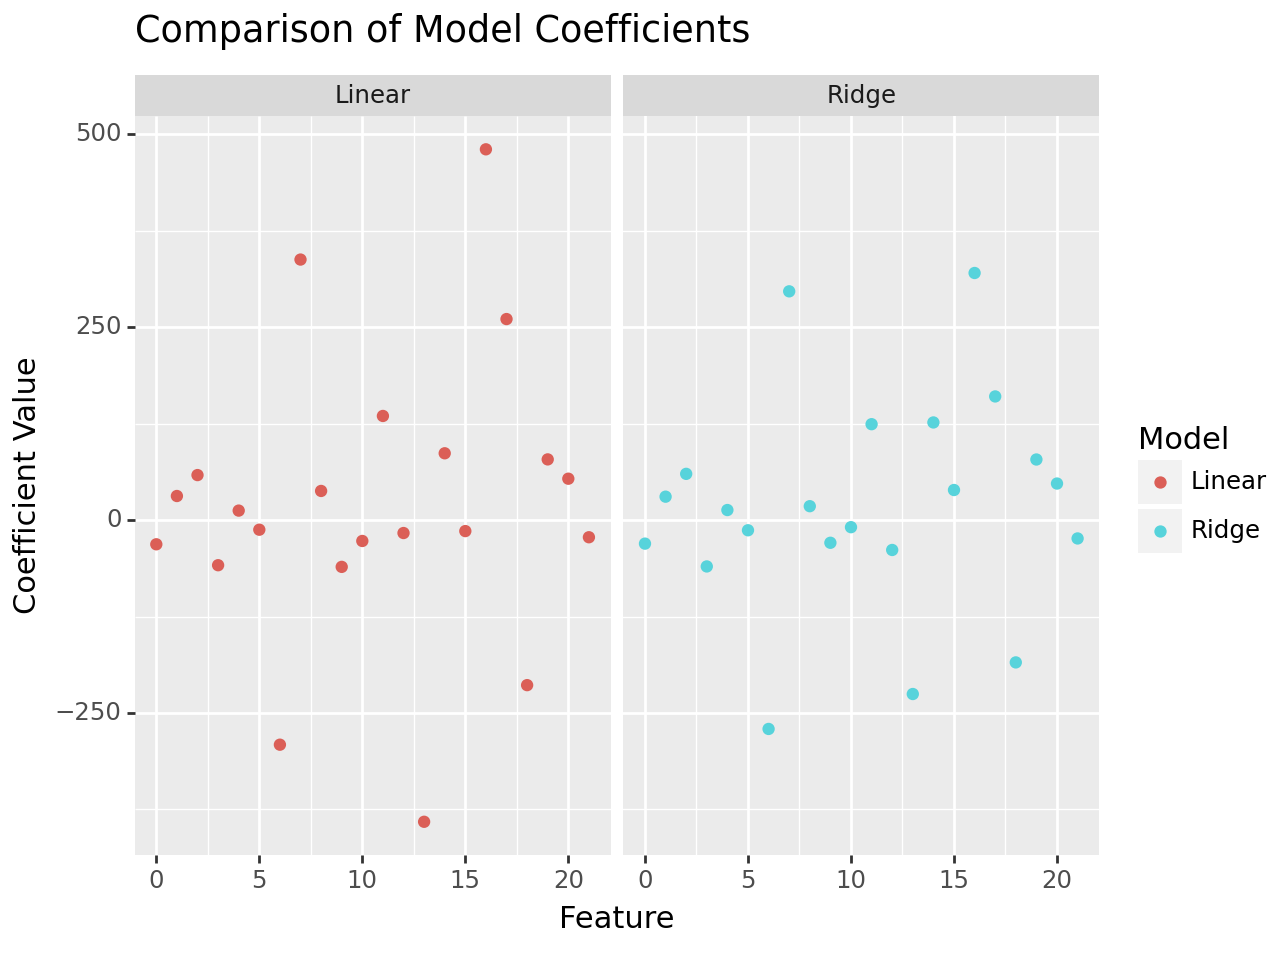

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import ggplot, aes, geom_point, labs, geom_bar, facet_wrap

ridge_pipeline.fit(X, y)
ridge_coefs = ridge_pipeline.named_steps['ridge_regression'].coef_

lr_pipeline.fit(X, y)
linear_coefs = lr_pipeline.named_steps['linear_regression'].coef_

coefs_df = pd.DataFrame({
    'Ridge': ridge_coefs,
    'Linear': linear_coefs,
    'Feature': range(len(ridge_coefs))
})

coefs_df = pd.DataFrame({
    'Coefficient Value': np.concatenate((ridge_coefs, linear_coefs)),
    'Model': ['Ridge'] * len(ridge_coefs) + ['Linear'] * len(linear_coefs),
    'Feature': list(range(len(ridge_coefs))) + list(range(len(linear_coefs)))
})

# Plot using plotnine
plot = (ggplot(coefs_df, aes(x='Feature', y='Coefficient Value', color='Model')) +
        geom_point() +
        labs(x='Feature', y='Coefficient Value', title='Comparison of Model Coefficients') +
        facet_wrap('Model'))
plot

For the final model, the best pipeline was the ridge pipeline containing all of the predictors.  The MSE for this model was 119144, and the R-squared value was 0.356.  You can see that from the graphed coefficients of the linear vs. ridge models, the ridge coefficient values vary less and are closer to zero than the linear coefficients.